# The Garden of Forking Data (2:20?)

> https://youtu.be/R1vcdhPBlXA



In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Globe example

In [22]:
def sim_globe(p=0.7, n=9):
    return np.random.choice(['W', 'L'], p=[p, 1-p], size=n)

print(sim_globe(p=1))
print(sum(sim_globe(p=0.5, n=int(1e4)) == 'W') / 1e4)

['W' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'W']
0.5054


Sample: ['W' 'L' 'W' 'W' 'W' 'W' 'W' 'L' 'L']


,poss,ways,post
0,0.00,0.0,0.000000
1,0.25,9.0,0.003323
2,0.50,512.0,0.189069
3,0.75,2187.0,0.807607
4,1.00,0.0,0.000000


<Axes: xlabel='poss', ylabel='post'>

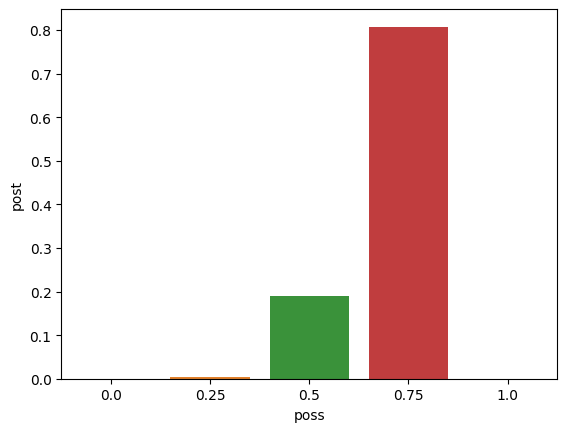

In [51]:
def compute_posterior(sample, world_size=4, poss=[0,0.25, 0.5, 0.75, 1.0]):
    W = sum(sample == 'W')
    L = sum(sample == 'L')
    f = lambda q: (world_size*q)**W * (world_size*(1-q))**L
    ways = np.array(list(map(f, poss, )))
    post = ways/ways.sum()
    return pd.DataFrame({'poss': poss, 'ways': ways, 'post': post})

sample = sim_globe()
df = compute_posterior(sim_globe())
print('Sample:', sample)
display(df)
sns.barplot(df, x='poss', y='post')
